# View controller

View control for searchers launched in s1_ridge_trials.ipynb.

### Searcher monitoring

In [1]:
%reset -f
from search import ridge

# list active searchers
ridge.search_status(smln_id='smln_2', recent=30)

The following searchers were active in the last 2 s:

smln_2   19   smln_2_random
smln_2   20   smln_2_guided

No searchers were suspended by errors.


In [2]:
# read optional error message
ridge.read_search_error(searcher_id=19)

No error found in searcher 19.


### Results scatter plot

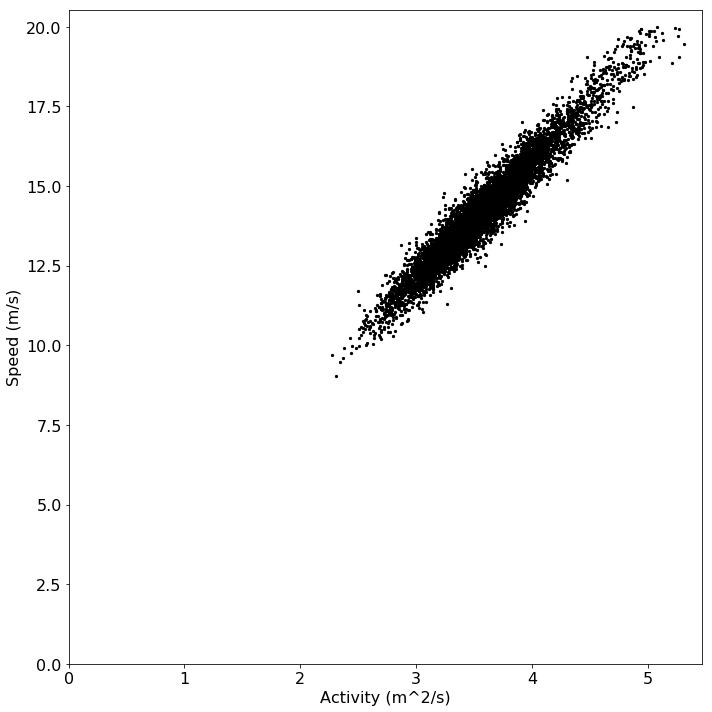

In [3]:
%reset -f
%matplotlib inline

import aux
from db.d_models import RidgeTrial as T
from search import ridge_viz

import PARAMETERS as P
from search import ridge_global as C


pre = {
    'w_n_pc_ec_vs_dist': aux.load(C.PATH_W_N_PC_EC_VS_DIST),
    'v_g_n_vs_w_n_pc_ec_fr_ec': aux.load(C.PATH_V_G_N_VS_W_N_PC_EC_FR_EC)
}

ridge_viz.rslt_scatter(
    smln_id='smln_2',
    filt=[T.stability > 0.5, T.activity < 6, T.speed < 20],
    lmt=10000, c='k', s=5);

### Fast trial lookup

In [4]:
ridge_viz.select_trials(
    smln_id='smln_2',
    filt=[T.stability > 0.5, T.speed < 12], order_by='speed', lmt=15
    )[[
        'id', 'speed', 'p_inh', 'rho_pc', 'z_pc', 'l_pc', 'w_a_pc_pc', 'p_a_inh_pc',
        'w_a_inh_pc', 'p_g_pc_inh', 'w_g_pc_inh', 'fr_ec'
    ]]

,id,speed,p_inh,rho_pc,z_pc,l_pc,w_a_pc_pc,p_a_inh_pc,w_a_inh_pc,p_g_pc_inh,w_g_pc_inh,fr_ec
0,84499,9.049026,0.104428,7705.015488,1.191610,0.025307,0.009749,0.076439,0.002045,0.046004,0.017458,39.837895
1,71035,9.472643,0.105712,7611.363732,1.091185,0.031798,0.006846,0.082994,0.002140,0.048835,0.014792,37.680679
2,73800,9.604151,0.111621,7783.469862,1.187452,0.026231,0.008921,0.084068,0.001853,0.047147,0.017752,38.448202
3,105574,9.679375,0.096636,7542.434746,1.210330,0.027029,0.008381,0.091805,0.003718,0.046538,0.023747,40.438859
4,76558,9.755435,0.090507,7656.131988,1.150909,0.029276,0.007676,0.090504,0.003985,0.042982,0.020813,39.386386
5,107470,9.917859,0.106806,10510.838848,1.093327,0.026991,0.006799,0.083448,0.002166,0.041386,0.015000,37.676299
6,78356,9.927371,0.089225,7545.674540,1.150621,0.031362,0.006899,0.086116,0.002888,0.045883,0.020471,38.674726
7,107455,9.979595,0.106507,10509.421889,1.091976,0.027031,0.006823,0.083177,0.002138,0.041540,0.015000,37.679214
8,106272,9.984574,0.094846,7564.469678,1.190077,0.026068,0.009166,0.093025,0.003955,0.050446,0.023052,41.243986
9,67259,10.006873,0.102443,7733.408239,1.125317,0.029429,0.007541,0.080277,0.003998,0.042087,0.020887,38.260265


### Example trials

RSLTS:
{'STABILITY': 1.0, 'ACTIVITY': 2.3459987762367733, 'SPEED': 9.4726427344375494}


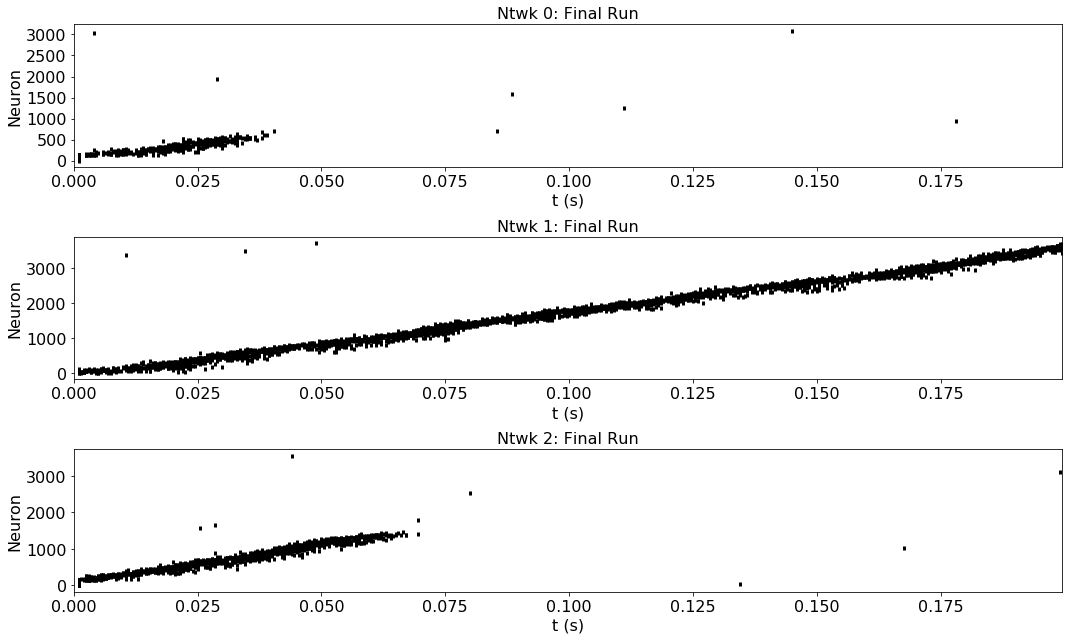

In [5]:
ridge_viz.raster(71035, pre, C, P, ax_height=3, colors=None);

RSLTS:
{'STABILITY': 1.0, 'ACTIVITY': 2.4386892162557032, 'SPEED': 9.755435433038036}


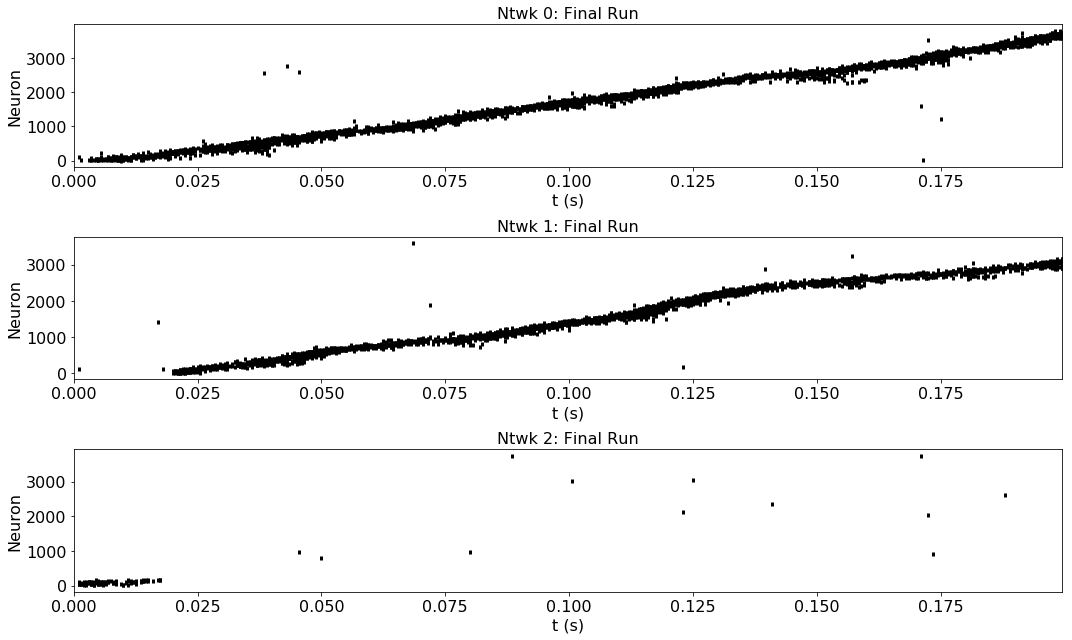

In [6]:
ridge_viz.raster(76558, pre, C, P, ax_height=3, colors=None);

### Parameter analysis

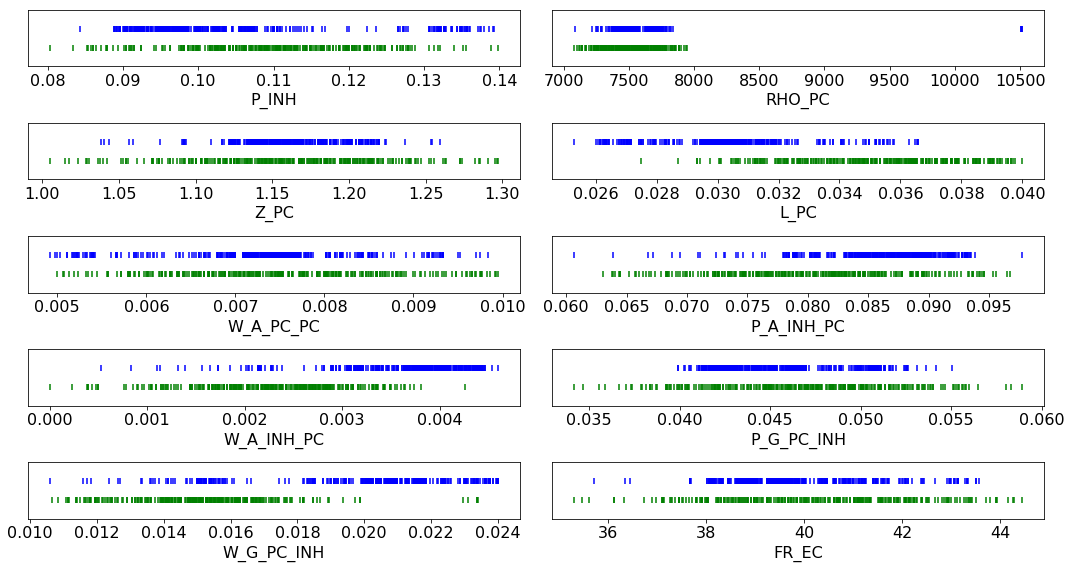

In [8]:
ridge_viz.trial_set_scatter(
    smln_id='smln_2',
    filts=[
        [T.stability > 0.5, T.speed < 12],
        [T.stability > 0.5, T.speed >= 20],
    ], cs=('b', 'g'), lmt=1000, s=30, marker='|', seed=0);